<a href="https://colab.research.google.com/github/lucimarNeves/dio-analise-dados-python/blob/main/TrabalhandoComPlanilhasDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [318]:
#importando a biblioteca pandas
import pandas as pd


In [319]:
#leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DigitalInnovation/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DigitalInnovation/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DigitalInnovation/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DigitalInnovation/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DigitalInnovation/datasets/Salvador.xlsx")


In [320]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [321]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [322]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [323]:
#Amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
201,Natal,2019-01-02,86.61,1036,1
238,Natal,2019-01-03,139.64,1035,1
73,Natal,2018-01-05,773.00,852,2
225,Salvador,2019-01-02,36.23,1035,1
41,Fortaleza,2019-02-13,191.29,1002,3


In [324]:
#verificando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [325]:
#alterando o tipo de dado de uma  coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [326]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [327]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


Tratando de Valores Faltantes


In [328]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [329]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [330]:
df["Vendas"].mean()

122.61180089485458

In [331]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [332]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
38,Salvador,2019-01-01,165.34,1034,3
8,Recife,2019-02-11,56.47,980,6
70,Natal,2019-02-14,743.00,854,4
154,Salvador,2019-01-02,9.58,1037,1
215,Salvador,2019-01-02,203.84,1036,1
127,Recife,2019-03-02,39.56,982,8
20,Salvador,2019-01-01,33.97,1034,3
85,Salvador,2019-01-01,16.88,1035,3
76,Aracaju,2018-01-01,33.51,1523,4
81,Salvador,2019-01-01,17.36,1037,2


In [333]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [334]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [335]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [336]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

Criando novas colunas

In [337]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [338]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [339]:
#Como verificar a quantidade, caso não exista a coluna

df["Receita/Vendas"] = df["Receita"] / df ["Vendas"]

In [340]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [341]:
#Retornando  a maiore receita
df["Receita"].max()

3544.0

In [342]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [343]:
#nlargest - retorna as 3 linhas com maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [344]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [345]:
#Agrupando por cidade

df.groupby("Cidade")["Receita"].sum()


Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [346]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


Trabalhando com datas

In [347]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [348]:
#Verificandoo tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [349]:
#Transformando a coluna Data em data
df["Data"] = pd.to_datetime(df["Data"])

In [350]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [351]:
#Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [352]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [353]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
10,Fortaleza,2019-01-01,179.88,1002,4,719.52,4.0,2019
6,Fortaleza,2019-01-01,38.40,1003,4,153.60,4.0,2019
72,Aracaju,2018-01-01,168.95,1523,7,1182.65,7.0,2018
26,Recife,2019-01-01,126.05,980,1,126.05,1.0,2019
14,Recife,2019-01-12,102.91,982,3,308.73,3.0,2019


In [354]:
#Extraindo o mês e o dia da venda
df["Mes_venda"], df["Dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [355]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_venda
161,Salvador,2019-01-02,5.80,1036,1,5.80,1.0,2019,1,2
87,Aracaju,2018-01-01,116.71,1520,4,466.84,4.0,2018,1,1
73,Salvador,2019-01-01,8.39,1037,1,8.39,1.0,2019,1,1
106,Aracaju,2018-01-01,16.32,1520,7,114.24,7.0,2018,1,1
78,Fortaleza,2019-01-01,37.66,1005,2,75.32,2.0,2019,1,1


In [356]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [357]:
#Calculando a diferença de dias
df["Difirenca_dias"] = df["Data"] - df["Data"].min()

In [358]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_venda,Difirenca_dias
33,Salvador,2019-01-01,144.19,1035,2,288.38,2.0,2019,1,1,365 days
46,Aracaju,2018-01-01,41.42,1522,2,82.84,2.0,2018,1,1,0 days
99,Recife,2019-01-01,136.72,980,4,546.88,4.0,2019,1,1,365 days
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days
221,Salvador,2019-01-02,142.23,1035,2,284.46,2.0,2019,1,2,366 days


In [359]:
#Criando a coluna de trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [360]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_venda,Difirenca_dias,Trimestre_Venda
25,Recife,2019-01-01,161.60,982,5,808.00,5.0,2019,1,1,365 days,1
3,Salvador,2019-02-10,176.34,1037,3,529.02,3.0,2019,2,10,405 days,1
59,Salvador,2019-01-01,138.27,1034,2,276.54,2.0,2019,1,1,365 days,1
139,Fortaleza,2019-03-02,141.16,980,7,988.12,7.0,2019,3,2,425 days,1
37,Fortaleza,2019-01-01,35.86,1002,6,215.16,6.0,2019,1,1,365 days,1


In [361]:
#Filtrando as vendas de 2019 do mês de março
Vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [362]:
Vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_venda,Dia_venda,Difirenca_dias,Trimestre_Venda
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
18,Natal,2019-03-14,581.00,853,3,1743.00,3.0,2019,3,14,437 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
129,Recife,2019-03-02,35.34,982,7,247.38,7.0,2019,3,2,425 days,1
82,Natal,2019-03-07,868.00,854,3,2604.00,3.0,2019,3,7,430 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1


Visualização de dados

In [363]:
#Fazendo uma contagem, do maior para menor, com uma amostragem de vendas(linhas) de cada loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

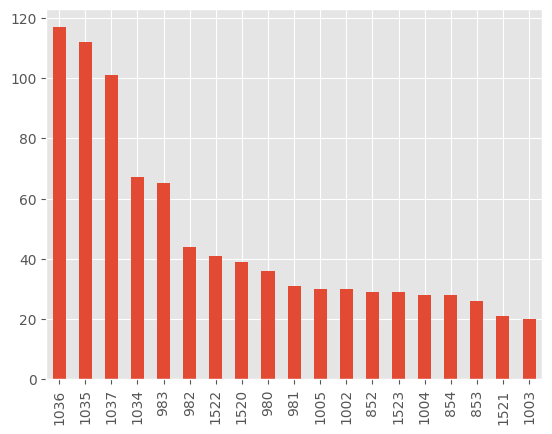

In [364]:
from pandas.io.formats.style import plt
#Gráfico de barras
vendas_realizadas = df["LojaID"].value_counts().plot.bar()



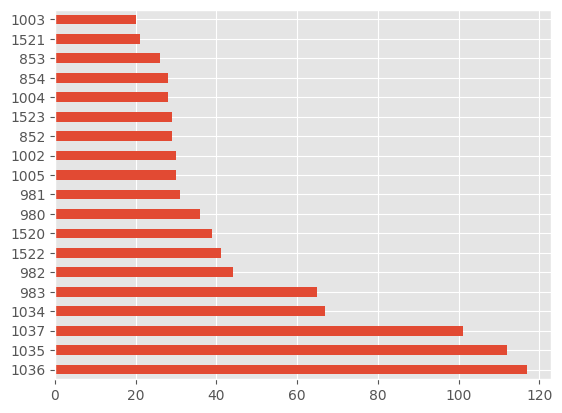

In [365]:
#Gráfico de barras horizotais
df["LojaID"].value_counts().plot.barh();

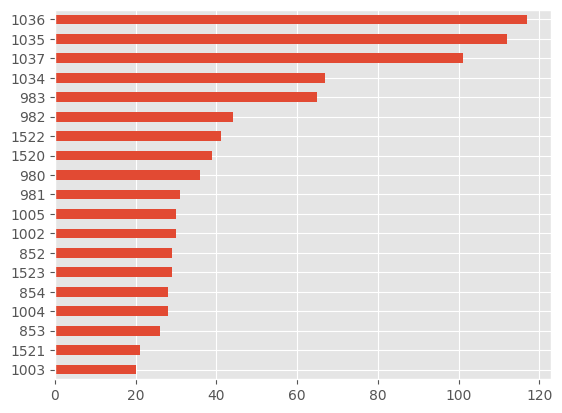

In [366]:
#Gráfico de barras horizonais do maior para o menor
df["LojaID"].value_counts(ascending=True).plot.barh();

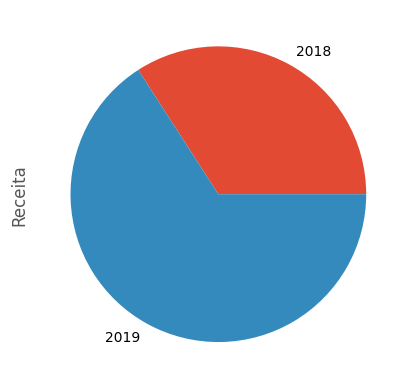

In [367]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [368]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

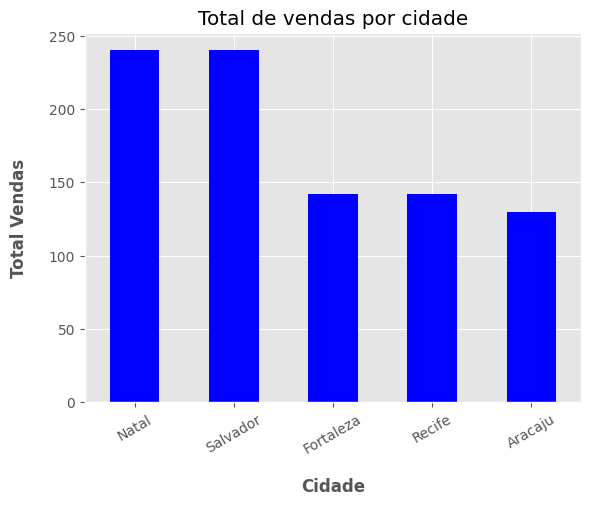

In [369]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="blue")

plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Cidade", fontweight='bold', fontsize=12,labelpad=15)
plt.ylabel("Total Vendas", fontweight='bold', fontsize=12,labelpad=15)

Text(0, 0.5, 'Total Vendas')

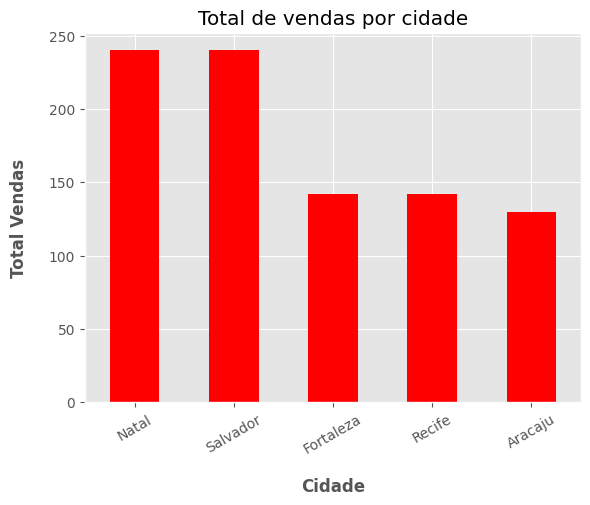

In [370]:
#Alterando a cor

fig, ax = plt.subplots()


df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")

plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Cidade", fontweight='bold', fontsize=12,labelpad=15)
plt.ylabel("Total Vendas", fontweight='bold', fontsize=12,labelpad=15)

In [371]:
#Alterar o estilo
plt.style.use("ggplot")

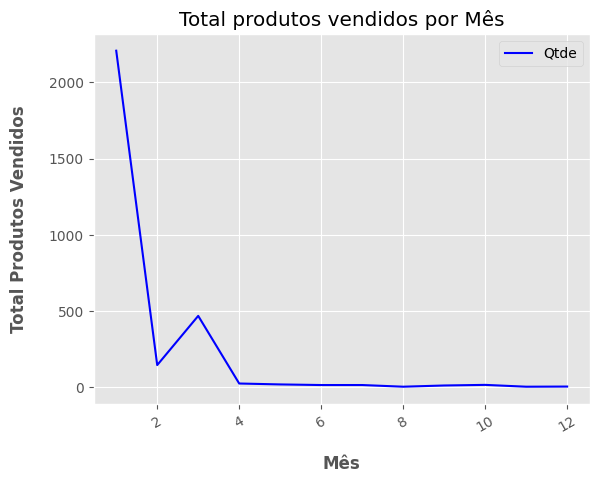

In [372]:
fig, ax = plt.subplots();

df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidos por Mês", color="blue");

plt.xticks(rotation=30, horizontalalignment="center");
plt.xlabel("Mês", fontweight='bold', fontsize=12,labelpad=15);
plt.ylabel("Total Produtos Vendidos", fontweight='bold', fontsize=12,labelpad=15);
plt.legend();

In [373]:
#Ano 2018 e 2019
df.groupby(df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [374]:
#Selecionando somente as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [375]:
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum()

Mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

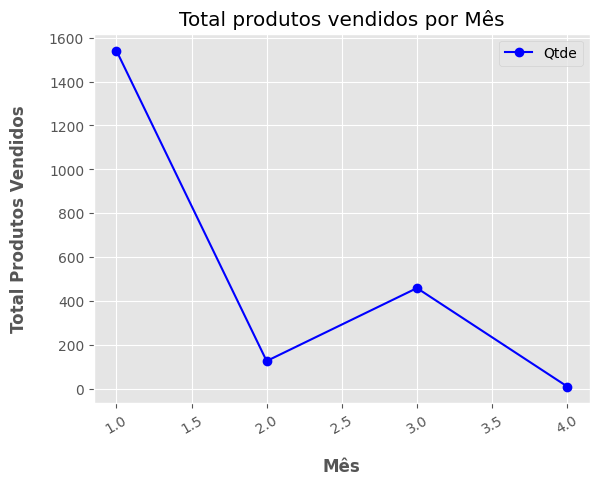

In [402]:
fig, ax = plt.subplots();

df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o", title="Total produtos vendidos por Mês", color="blue");

plt.xticks(rotation=30, horizontalalignment="center");
plt.xlabel("Mês", fontweight='bold', fontsize=12,labelpad=15);
plt.ylabel("Total Produtos Vendidos", fontweight='bold', fontsize=12,labelpad=15);
plt.legend();
plt.savefig("Grafico de QTDE x MES.png")

In [377]:
#Selecionando somente as vendas de 2019
df_2018 = df[df["Ano_Venda"] == 2018]

In [378]:
df_2018.groupby(df_2018["Mes_venda"])["Qtde"].sum()

Mes_venda
1     667
2      16
3       7
4      11
5      17
6      13
7      13
8       2
9      10
10     14
11      2
12      3
Name: Qtde, dtype: int64

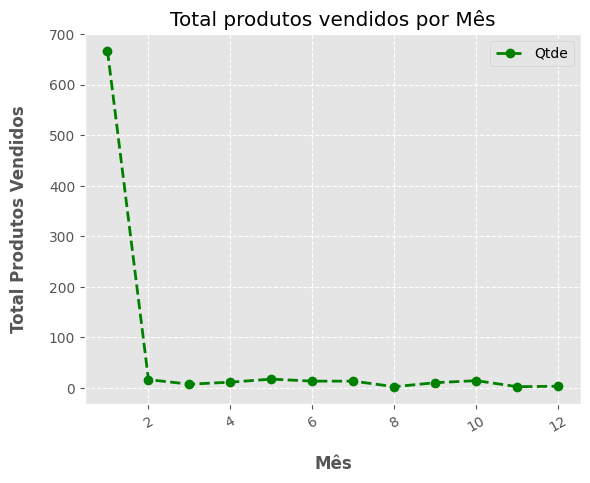

In [379]:
#Gráfico de quantidade de vendas por mês no ano de 2018

fig, ax = plt.subplots();

df_2018.groupby(df_2018["Mes_venda"])["Qtde"].sum().plot(marker = "o",lw = 2, ls = '--', ms = 6, title="Total produtos vendidos por Mês", color="green");

plt.xticks(rotation=30, horizontalalignment="center");
plt.xlabel("Mês",  fontweight='bold', fontsize=12,labelpad=15);
plt.ylabel("Total Produtos Vendidos", fontweight='bold', fontsize=12,labelpad=15);
ax.grid(ls = '--')
plt.legend();

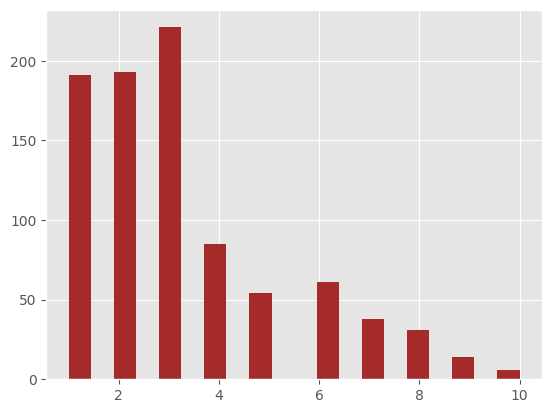

In [411]:
#Histograma
plt.hist(df["Qtde"], color="brown", bins=20);

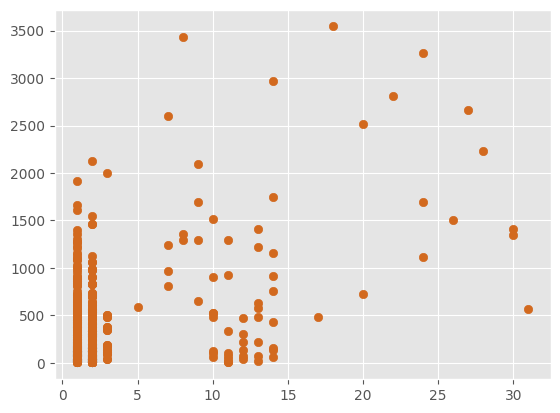

In [401]:
plt.scatter(x=df_2019["Dia_venda"], y = df_2019["Receita"], color="chocolate");



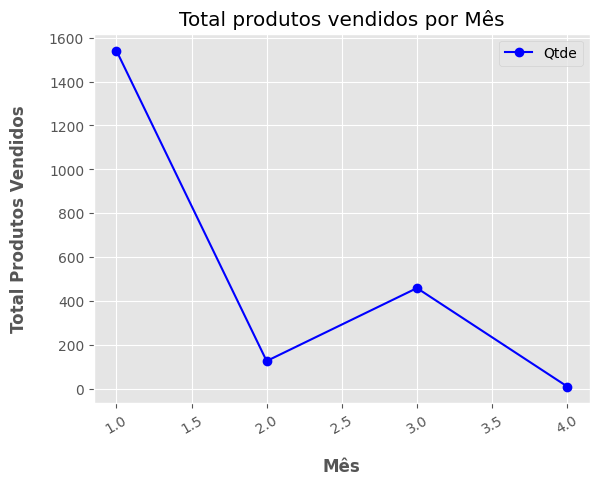

In [403]:
#salvando em png
fig, ax = plt.subplots();

df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o", title="Total produtos vendidos por Mês", color="blue");

plt.xticks(rotation=30, horizontalalignment="center");
plt.xlabel("Mês", fontweight='bold', fontsize=12,labelpad=15);
plt.ylabel("Total Produtos Vendidos", fontweight='bold', fontsize=12,labelpad=15);
plt.legend();
plt.savefig("Grafico de QTDE x MES.png")
